# Simulating the Impact of Backlog Reduction on Placement Outcomes: A Data-Driven Study

## Table of Contents

1. [**Introduction**](#introduction)
   - Project Overview
   - Dataset Description
   
2. [**Acquiring and Loading Data**](#acquisition)
   - Importing Libraries
   - Loading Data
   - Basic Data Exploration
   - Identified Issues
   
3. [**Data Preprocessing**](#preprocessing)
   - Data Sanitization: Dropping, Sorting, and Fixing Errors
   - Outlier Detection
   - Standardizing Categorical Values
   - Verification of Data Integrity
   
4. [**Data Analysis**](#analysis)
   - Statistical Analysis
   - Logistic Regression
   - Visualizations

5. [**Conclusion**](#conclusion)
   - Key Insights
   - Recommendations
   - Next Steps

6. [**Epilogue**](#epilogue)
   - References
   - Versioning 

# 1. Introduction

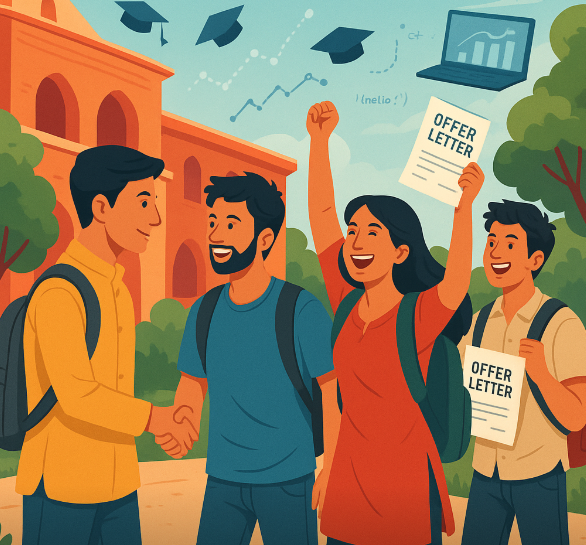

### Project Description

**Goal:** 

This project aims to analyze the impact of academic backlogs on campus placement outcomes and simulate how reducing backlog rates can improve placement performance. Rather than predicting which students are likely to have backlogs, the focus is on understanding the practical consequences of backlog prevalence and exploring how institutional efforts to reduce them can translate into better placement rates and stronger college reputation.
This is highly relevant in the Indian academic context, where backlogs directly affect placement eligibility, influencing student careers and future admissions.

<p> </p>

**Questions to be Answered:**

- What is the current relationship between backlog status and placement rates?
- What would happen to overall placement rates if backlog rates were reduced institutionally? 
- Can a 10–50% reduction in backlogs translate to measurable improvements in placement?
- How can simulation help in estimating potential placement gains under different backlog reduction scenarios? Can this inform administrative or policy-level decisions?

<p> </p>

**Methodology:** 

The project involved exploratory data analysis (EDA) to identify factors linked to backlogs using stats and visuals. A sensitivity analysis was also done through simulation to estimate how reducing backlog rates could improve placement outcomes.

<p> </p>

### Data Description

**Content:** 

This dataset is a CSV file of approximately 990 data points, containing academic and placement records for undergraduate students at a University in Bengaluru, India.

<p> </p>

**Description of Attributes:** 

| Column            | Description                                      |
| :---------------- | :----------------------------------------------- |
| Stream            | Academic stream (e.g., Commerce, Science, Arts)   |
| Current Degree    | Undergraduate degree (e.g., BCom, BCA, BSc)       |
| 10th%             | 10th-grade board exam percentage (0–100)         |
| 12th%             | 12th-grade board exam percentage (0–100)         |
| UG%               | Undergraduate percentage (0–100)                 |
| Backlog           | Presence of failed courses (Yes/No)              |
| Work Experience   | Prior work experience (Yes/No)                   |
| Placement Status  | Campus placement outcome (Placed/Not Placed)     |

**Description of Courses:**

| Course                               | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| **Bachelor of Visual Communication (BVC)** | Focuses on media, design, and visual storytelling, including graphic design, film, and photography. |
| **Bachelor of Vocational Degree (BVoc)**     | Skill-based program tailored to specific industries like retail, tourism, IT, or healthcare, emphasizing practical training. |
| **Bachelor of Social Work (BSW)**           | Prepares students for careers in social services, focusing on community development, welfare, and counseling. |
| **Bachelor of Science (BSc)**               | Academic degree in sciences like Physics, Chemistry, Biology, or Mathematics; emphasizes theory and research. |
| **Bachelor of Commerce (BCom)**             | Business-focused degree covering accounting, finance, economics, and management. |
| **Bachelor of Computer Application (BCA)**  | IT and software-focused degree teaching programming, databases, and systems design. |
| **Bachelor of Business Administration (BBA)** | Professional degree in business operations, marketing, HR, and entrepreneurship. |
| **Bachelor of Arts (BA)**                   | Broad humanities degree with majors like English, History, Psychology, or Political Science. |


<p> </p>

**Acknowledgements:** 

This dataset is provided by a University In Bengaluru, India, Placement Cell. It was obtained in 2022 for a Master’s project on placement prediction. The dataset is private and not available online.

# 2. Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [235]:
df = pd.read_csv('Student_records.csv')

### Basic Data Exploration

In [236]:
print('Rows count:', df.shape[0],'\nColumns count:', df.shape[1])
print("---- First 5 Rows ----")
print(df.head())
print("---- Last 5 Rows ----")
print(df.tail())
print("---- Summary Statistics ----")
print(df.describe())

Rows count: 990 
Columns count: 9
---- First 5 Rows ----
   Sl No    Stream Current Degree  10th%  12th%     UG% Backlog  \
0      1  Commerce            BBA  97.28  94.80  74.170     Yes   
1      2   Science            BSc  86.75  83.25  82.000      No   
2      3      Arts             BA  82.80  90.00  69.670      No   
3      4  Commerce            BBA  62.20  58.16  52.920     Yes   
4      5  Commerce            BBA  76.00  79.83  59.056     Yes   

  Work Experience  Placement Status  
0               No       Not Placed  
1               No           Placed  
2               No       Not Placed  
3               No       Not Placed  
4               No       Not Placed  
---- Last 5 Rows ----
     Sl No    Stream Current Degree  10th%  12th%   UG% Backlog  \
985    986   Science            BSc  88.00  93.50  80.0      No   
986    987   Science            BSc  87.00  79.00  54.0     Yes   
987    988  Commerce            BBA  92.96  94.67  73.0      No   
988    989  Commerce  

### Identfying Issues
#### Check Data Types

In [237]:
print("---- Dataset Info ----")
print(df.info())

---- Dataset Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl No             990 non-null    int64  
 1   Stream            990 non-null    object 
 2   Current Degree    990 non-null    object 
 3   10th%             990 non-null    float64
 4   12th%             990 non-null    float64
 5   UG%               990 non-null    float64
 6   Backlog           990 non-null    object 
 7   Work Experience   990 non-null    object 
 8   Placement Status  990 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB
None


#### Check Missing Data

In [238]:
print("---- No of Missing Values ----")
print(df.isnull().sum())
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
     print(missing_percent[missing_percent > 0] * 100)
else:
     print('None')

---- No of Missing Values ----
Sl No               0
Stream              0
Current Degree      0
10th%               0
12th%               0
UG%                 0
Backlog             0
Work Experience     0
Placement Status    0
dtype: int64
---- Percentage of Missing Values (%) -----
None


#### Check for Duplicate Rows

In [239]:
print('No. of entirely duplicated rows:', df.duplicated().sum())

No. of entirely duplicated rows: 0


#### Check Uniqueness of Data

In [240]:
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
Backlog             50.000000
Work Experience     50.000000
Placement Status    50.000000
Stream              25.000000
Current Degree      12.500000
10th%                0.333333
12th%                0.332226
UG%                  0.257732
Sl No                0.101010
dtype: float64


- The percentage similarity of values are higher for `Backlog`, `Work Experience`, `Placement Status`, `Stream` & `Current Degree` as they are categorical variables.

#### Check Data Range

In [241]:
df.describe(include='all')
# !pip install skimpy
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 990    │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Sl No     │    0 │       0 │    495.5 │    285.9 │    1 │   248.2 │   495.5 │   742.8 │     990 │  ▇▇▇▇▇▇  │  │
│ │ 10th%     │    0 │       0 │       81 │    11.46 │    7 │   74.52 │      82 │   89.94 │     100 │     ▂▇▇  │  │
│ │ 12th%     │    0 │       0 │    79.45 │    11.42 │    7 │      73 │   81.81 │      88 │     100 │     ▃▇▇  │  │
│ │ UG%       │    0 │       0 │    67.39 │    8.832 │    7 │   60.64 │   67.09 │      73 │   90.66 │     ▅▇▂  │  │
│ └───────────┴──────┴─────────┴──────────┴──────────┴──────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃            ┃         ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min        ┃ max     ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Stream     │  0 │    0 │ Arts     │ Profession │ Arts       │ Science │      7.32 │          1 │       990 │  │
│ │            │    │      │          │ al         │            │         │           │            │           │  │
│ │ Current    │  0 │    0 │ BA       │ BCom       │ BA         │ BVoc    │      3.21 │          1 │       990 │  │
│ │ Degree     │    │      │          │            │            │         │           │            │           │  │
│ │ Backlog    │  0 │    0 │ No       │ Yes        │ No         │ Yes     │      2.33 │          1 │       990 │  │
│ │ Work       │  0 │    0 │ No       │ Yes        │ No         │ Yes     │      2.34 │          1 │       990 │  │
│ │ Experience │    │      │          │            │            │         │           │            │           │  │
│ │ Placement  │  0 │    0 │ Placed   │ Not Placed │ Not Placed │ Placed  │         8 │        1.5 │      1485 │  │
│ │ Status     │    │      │          │            │            │         │           │            │           │  │
│ └────────────┴────┴──────┴──────────┴────────────┴────────────┴─────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

- From the summary statistics, it was observed that the minimum values for `10th%`, `12th%`, and `UG%` are 7, which is not a practically valid percentage. This suggests that some students may have entered CGPA (out of 10) instead of percentage (out of 100). 
- To address this, the dataset will be sorted in ascending order for these fields to identify such anomalies, and the incorrect values will be corrected in the subsequent data preprocessing step.

# 3. Data Preprocessing

### Data Sanitization: Dropping, Sorting, and Fixing Errors

#### Drop Redundant Columns

In [242]:
# Drop the 'Sl No' column
df = df.drop('Sl No', axis=1)

df.rename(columns={
    '10th%': 'Tenth_Percent',
    '12th%': 'Twelfth_Percent',
    'UG%': 'UG_Percent'
}, inplace=True)
print(df)

       Stream Current Degree  Tenth_Percent  Twelfth_Percent  UG_Percent  \
0    Commerce            BBA          97.28            94.80      74.170   
1     Science            BSc          86.75            83.25      82.000   
2        Arts             BA          82.80            90.00      69.670   
3    Commerce            BBA          62.20            58.16      52.920   
4    Commerce            BBA          76.00            79.83      59.056   
..        ...            ...            ...              ...         ...   
985   Science            BSc          88.00            93.50      80.000   
986   Science            BSc          87.00            79.00      54.000   
987  Commerce            BBA          92.96            94.67      73.000   
988  Commerce           BCom          87.00            93.00      70.000   
989  Commerce           BCom          87.00            89.00      70.000   

    Backlog Work Experience  Placement Status  
0       Yes               No       Not 

#### Detecting and Reviewing Anomalies

In [243]:
df_sorted = df.sort_values(by='Tenth_Percent', ascending=True)
print("Dataset sorted by 10th%:\n")
print(df_sorted[['Tenth_Percent', 'Twelfth_Percent','UG_Percent']].head(10))

Dataset sorted by 10th%:

     Tenth_Percent  Twelfth_Percent  UG_Percent
868            7.0             7.00         7.5
499            7.5             7.10         8.0
336            8.0             7.50         7.0
866            9.0             8.40         8.6
633           50.0            55.00        75.0
340           51.0            61.00        70.0
602           53.0            51.00        55.0
738           53.0            84.00        65.0
537           53.2            61.00        70.0
743           54.0            66.16        56.0


- Hence it is clear that 4 students have entered the CGPA in place of percentage.

#### Convert CGPA (<10) to percentage in `10th%`, `12th%`, & `UG%`

In [244]:
percentage_cols = ['Tenth_Percent', 'Twelfth_Percent','UG_Percent']

# Identify and convert CGPA values
for col in percentage_cols:
    cgpa_mask = df[col] < 10
    print(f"{col} CGPA values (<10): {cgpa_mask.sum()}")
    if cgpa_mask.any():
        df.loc[cgpa_mask, col] *= 9.5

        # Cap values >100 and verify
print("\n---- After conversion ----")
for col in percentage_cols:
    df.loc[df[col] > 100, col] = 100
    print(f"{col} Summary:\n{df[col].describe()}")
    invalid = df[(df[col] < 0) | (df[col] > 100)][col]

Tenth_Percent CGPA values (<10): 4
Twelfth_Percent CGPA values (<10): 4
UG_Percent CGPA values (<10): 4

---- After conversion ----
Tenth_Percent Summary:
count    990.000000
mean      81.274256
std       10.488227
min       50.000000
25%       74.560000
50%       82.000000
75%       89.942500
max      100.000000
Name: Tenth_Percent, dtype: float64
Twelfth_Percent Summary:
count    990.000000
mean      79.709084
std       10.473492
min       45.830000
25%       73.000000
50%       81.815000
75%       88.000000
max      100.000000
Name: Twelfth_Percent, dtype: float64
UG_Percent Summary:
count    990.000000
mean      67.658493
std        7.990916
min       52.000000
25%       60.930000
50%       67.280000
75%       73.015000
max       90.660000
Name: UG_Percent, dtype: float64


- We assume the variables `Tenth_Percent`, `Twelfth_Percent`,`UG_Percent` values entered as CGPA (out of 10) instead of percentages, which were converted using a standard multiplier as per standard guidelines of Indian Universities.

### Outlier detection using Inter-Quartile Range


Tenth_Percent Outliers: 2
340    51.0
633    50.0
Name: Tenth_Percent, dtype: float64

Twelfth_Percent Outliers: 5
46     50.00
205    45.83
281    49.50
658    45.83
948    49.50
Name: Twelfth_Percent, dtype: float64

UG_Percent Outliers: 0


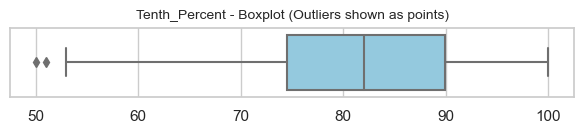

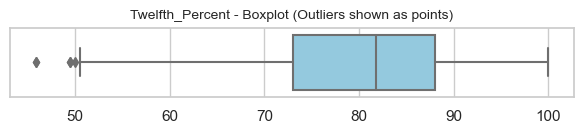

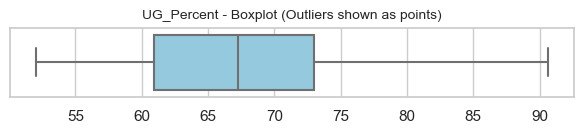

In [245]:
for col in percentage_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\n{col} Outliers: {len(outliers)}")
    if outliers.any():
        print(outliers)

sns.set(style="whitegrid")
for col in percentage_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'{col} - Boxplot (Outliers shown as points)', fontsize=10)
    plt.xlabel('')
    plt.tight_layout()
    plt.show()       

- Low grades (45–51%) in 10th% and 12th% were flagged as outliers because the dataset’s higher mean reflects the College’s high admission standards. Keeping these valid outliers helps identify at-risk students for targeted support to reduce backlogs.



### Convert categorical columns to category type

In [246]:
categorical_cols = ['Stream', 'Current Degree', 'Backlog', 'Work Experience ', 'Placement Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

### Verifying Data Integrity

#### Check and drop duplicates

In [248]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows: 0


#### Confirm no missing values

In [249]:
print("-- Final Missing Values --")
print(df.isnull().sum())

-- Final Missing Values --
Stream              0
Current Degree      0
Tenth_Percent       0
Twelfth_Percent     0
UG_Percent          0
Backlog             0
Work Experience     0
Placement Status    0
dtype: int64


#### Final data information

In [250]:
print("\n----- Final Data Info -----")
print(df.info())


----- Final Data Info -----
<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 989
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Stream            956 non-null    category
 1   Current Degree    956 non-null    category
 2   Tenth_Percent     956 non-null    float64 
 3   Twelfth_Percent   956 non-null    float64 
 4   UG_Percent        956 non-null    float64 
 5   Backlog           956 non-null    category
 6   Work Experience   956 non-null    category
 7   Placement Status  956 non-null    category
dtypes: category(5), float64(3)
memory usage: 35.5 KB
None


- The dataset is now clean and ready for further analysis. The procedures performed above ensures that the data is accurate, relevant, and structured appropriately for meaningful insights and modeling.

# 4. Data Analysis

In [251]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Visualization & Analysis to understand the Data

#### Distribution of Branch of Study

Most common Branch of Study: ['Commerce'] with count: 403


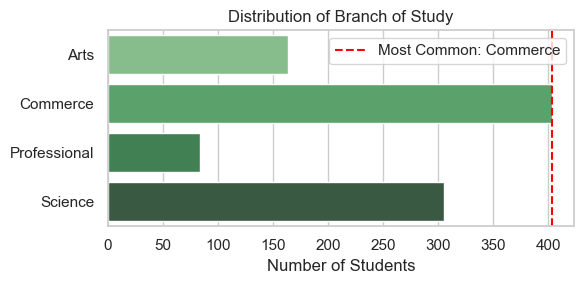

In [252]:
most_common_stream=df['Stream'].mode()[0]
stream_counts=df['Stream'].value_counts()
print("Most common Branch of Study:",[most_common_stream],"with count:",stream_counts[most_common_stream])

#Graphical Representation using bar plot:
plt.figure(figsize=(6, 3))
sns.barplot(x=stream_counts.values,y=stream_counts.index,palette='Greens_d')
plt.title('Distribution of Branch of Study')
plt.xlabel('Number of Students')
plt.ylabel('')
plt.axvline(x=stream_counts[most_common_stream], color='red', linestyle='--', label=f'Most Common: {most_common_stream}')
plt.legend()
plt.tight_layout()

#### Distribution of Course (Degree)

Most common Degree: ['BCom'] with count: [314]


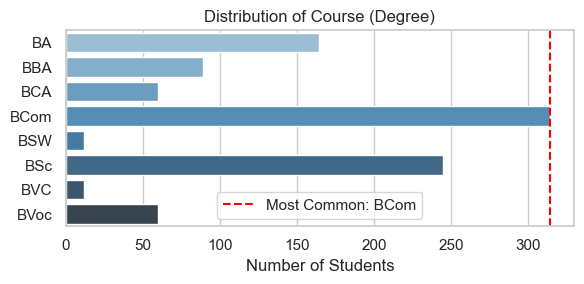

In [253]:
most_common_degree=df['Current Degree'].mode()[0]
degree_counts=df['Current Degree'].value_counts()
print("Most common Degree:",[most_common_degree],"with count:",[degree_counts[most_common_degree]])

#Graphical Representation using bar plot:
plt.figure(figsize=(6, 3))
sns.barplot(x=degree_counts.values,y=degree_counts.index,palette='Blues_d')
plt.title('Distribution of Course (Degree)')
plt.xlabel('Number of Students')
plt.ylabel('')
plt.axvline(x=degree_counts[most_common_degree], color='red', linestyle='--', label=f'Most Common: {most_common_degree}')
plt.legend()
plt.tight_layout()

- With 314 students from B.Com and 403 students from the broader Commerce stream, it’s clear this crew is dominating the data.

#### From Toppers to Survivors: The Great Academic Slide from 10th to UG!


Average 10th% of Students: 81.24 %
Average 12th% of Students: 79.66 %
Average UG% of Students: 67.62 %



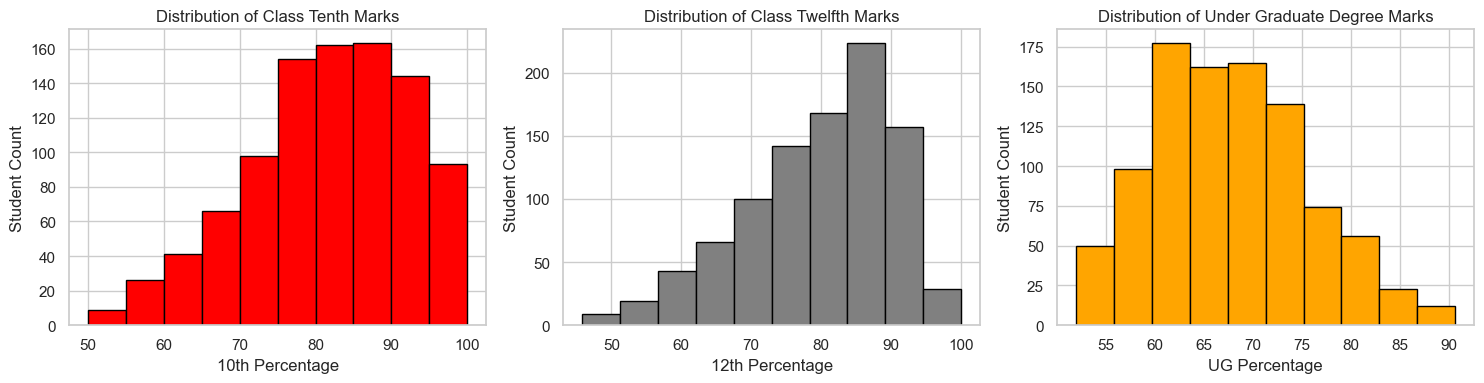

In [254]:
# Calculate averages
Tenth = df['Tenth_Percent']
Twelfth = df['Twelfth_Percent']
UG = df['UG_Percent']

average_ten = round(Tenth.mean(), 2)
average_twe = round(Twelfth.mean(), 2)
average_ug = round(UG.mean(), 2)

print(f"\nAverage 10th% of Students: {average_ten} %")
print(f"Average 12th% of Students: {average_twe} %")
print(f"Average UG% of Students: {average_ug} %\n")

# Plot all 3 histograms in one line
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 10th %
axs[0].hist(Tenth.dropna(), color='red', edgecolor='black')
axs[0].set_title('Distribution of Class Tenth Marks')
axs[0].set_xlabel('10th Percentage')
axs[0].set_ylabel('Student Count')

# 12th %
axs[1].hist(Twelfth.dropna(), color='grey', edgecolor='black')
axs[1].set_title('Distribution of Class Twelfth Marks')
axs[1].set_xlabel('12th Percentage')
axs[1].set_ylabel('Student Count')

# UG %
axs[2].hist(UG.dropna(), color='orange', edgecolor='black')
axs[2].set_title('Distribution of Under Graduate Degree Marks')
axs[2].set_xlabel('UG Percentage')
axs[2].set_ylabel('Student Count')

plt.tight_layout()
plt.show()

- Scores show a clear drop as students move from 10th Grade to undergrad. In 10th grade, most are scoring between 80–90% like a strong rocket launch fueled by parents and teachers. 
- By 12th grade, marks start to spread out more, reflecting the turbulence of late night study sessions and growing pressure about the future. 
- Then comes undergrad, where the average dips to around 60–70%. It’s like hitting a plot twist, more self-study, endless assignments. The dip isn’t failure but it’s just real life asking for better support and smarter strategies (and maybe fewer 8 AM lectures).

#### Backlogs and Branch Battles: Who’s Acing It? and Who’s Facing It?

In [255]:
# Function to create a table for backlog 'Yes' rates
def display_backlog_yes_table(df, group_col, title):
    # Calculate backlog rates (proportions)
    table = df.groupby(group_col)['Backlog'].value_counts(normalize=True).unstack().fillna(0)
    # Extract 'Yes' column 
    yes_col = 'Yes' if 'Yes' in table.columns else table.columns[table.columns != 'No'][0]
    table = table[[yes_col]] * 100  # Convert to percentages
    # Rename column
    table.columns = ['Backlog Rate (%)']
    # Reset index
    table = table.reset_index()
    # Print table
    print(f"\n{title}")
    print(table.to_string(index=False))

# Generate tables
display_backlog_yes_table(df, 'Stream', '---- Backlog Rate by Stream ----')
display_backlog_yes_table(df, 'Current Degree', '--Backlog Rate by Current Degree--')
display_backlog_yes_table(df, 'Work Experience ', '--Backlog Rate by Work Experience--')
display_backlog_yes_table(df, 'Placement Status', '--Backlog Rate by Placement Status--')


---- Backlog Rate by Stream ----
      Stream  Backlog Rate (%)
        Arts         34.756098
    Commerce         31.265509
Professional         32.142857
     Science         35.081967

--Backlog Rate by Current Degree--
Current Degree  Backlog Rate (%)
            BA         34.756098
           BBA         39.325843
           BCA         26.666667
          BCom         28.980892
           BSW         33.333333
           BSc         37.142857
           BVC          8.333333
          BVoc         36.666667

--Backlog Rate by Work Experience--
Work Experience   Backlog Rate (%)
              No         35.104670
             Yes         29.552239

--Backlog Rate by Placement Status--
Placement Status  Backlog Rate (%)
      Not Placed         64.123711
          Placed          1.273885


- From the above results it looks like Science and BVoc students are juggling a few more backlogs, maybe their academic workload is a bit like trying to solve a Rubik’s cube blindfolded!
- Commerce and BVC students seem to have it a bit easier on that front. 
- **Fun fact**: Those with some work experience are like the seasoned pros, as they’ve cracked the code and usually have fewer backlogs.
- It’s  also clear that students with more backlogs tend to have much lower chances of getting placed. Their placement prospects drop faster than the phone battery after a long day of scrolling. This just goes to show how important it is to keep up with academics to boost job opportunities.

### Counterfactual Analysis
#### What’s Happening Here?
- We’re exploring a hypothetical scenario: What if students had no backlogs?

#### Using actual placement data, we simulate and compare:

- Placement rate of students with backlogs
- Placement rate of students without backlogs

#### This helps us understand how backlogs impact placement chances and estimate how many more students might have been placed in a backlog-free world.

In [256]:
# Define required variables before simulation
placement_by_backlog = df.groupby('Backlog')['Placement Status'].value_counts(normalize=True).unstack()['Placed'] * 100

current_backlog_rate = df['Backlog'].value_counts(normalize=True)['Yes']
placement_rate_no_backlog = placement_by_backlog['No']
placement_rate_with_backlog = placement_by_backlog['Yes']


Placement Status Summary:
                  Count  Percentage
Placement Status                   
Not Placed          485   50.732218
Placed              471   49.267782


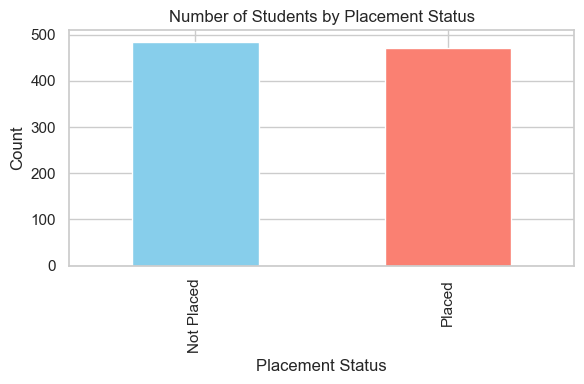

In [257]:
# Calculate counts and percentages
placement_counts = df['Placement Status'].value_counts()
placement_percentages = df['Placement Status'].value_counts(normalize=True) * 100

# Combine into a DataFrame
placement_summary = pd.DataFrame({
    'Count': placement_counts,
    'Percentage': placement_percentages
})
print("\nPlacement Status Summary:")
print(placement_summary)

# Bar plot for visualization
plt.figure(figsize=(6, 4))
placement_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Students by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('placement_status_plot.png')
plt.show()

In [258]:
# Create a DataFrame for the table
data = pd.DataFrame({
    "Backlog Reduction (%)": [int(r * 100) for r in reduction_rates],
    "Simulated Placement Rate (%)": [round(p, 2) for p in placement_rates]
})

# Display the table
print(data)

   Backlog Reduction (%)  Simulated Placement Rate (%)
0                      0                         49.27
1                     10                         51.62
2                     20                         53.97
3                     30                         56.32
4                     40                         58.67
5                     50                         61.02


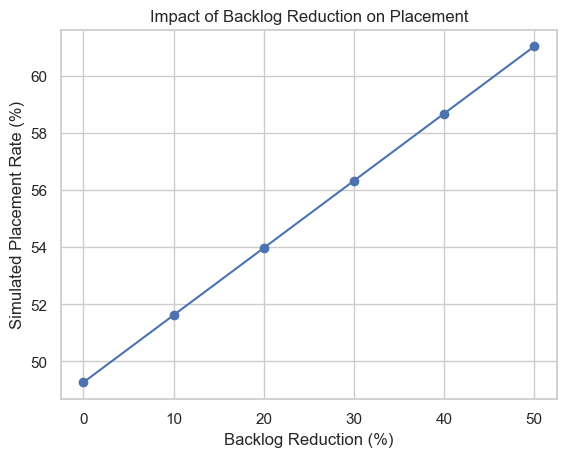

In [259]:
reduction_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
placement_rates = []

for r in reduction_rates:
    new_backlog_rate = current_backlog_rate * (1 - r)
    new_placement = (1 - new_backlog_rate) * placement_rate_no_backlog + new_backlog_rate * placement_rate_with_backlog
    placement_rates.append(new_placement)

plt.plot([int(r*100) for r in reduction_rates], placement_rates, marker='o')
plt.xlabel("Backlog Reduction (%)")
plt.ylabel("Simulated Placement Rate (%)")
plt.title("Impact of Backlog Reduction on Placement")
plt.grid(True)
plt.show()

- The simulation clearly shows a linear and positive relationship between backlog reduction and placement outcomes. Even a modest institutional effort to reduce backlogs by 20–30% can yield a noticeable 4–7% improvement in overall placement rates. This provides a data-driven argument for policy interventions aimed at supporting at-risk students to clear their backlogs.

# 5. Conclusions

### Key Insights
- Turns out, backlogs are like termites in the placement pipeline, the more students leave them, the more they eat into their success rate.
- From a numbers perspective, our little simulation shows that every 10% drop in backlogs buys you a ~2.35% boost in placements. That’s not just a win for students, it’s a return on academic investment for colleges too.

### Recommendation
- Colleges should throw in some “Backlog Bouncer” crash courses to help students clear subjects faster.
- Maybe Placement-Cell can sweet-talk companies into giving second chances to students with backlogs but good skills?
- Having a backlog bootcamp? Get in, grind hard, so students get out backlog-free before placement starts!

### Next Steps
- This data already says a lot, but there’s still more to uncover. The plan is to dig deeper by talking to students who've faced backlogs, through anonymous surveys, to really understand what’s holding them back. Is it teaching style? Mental pressure? Lack of motivation or just plain confusion?
- These real insights can help design smarter, low cost solutions like peer mentoring, flexible classes, or better exam preparation. Plus, we could also explore how backlog clearance helps students shine in higher education and abroad dreams, because better profiles = better admits and visas!
- Basically, it's about listening first, fixing smart, and making things better for everyone, without breaking the bank.

### My Take:
- Handling backlogs smartly can be a win-win for students, colleges, and companies. Colleges often avoid costly backlog bootcamps, but by focusing on effective support to help students clear backlogs, they can improve outcomes without huge expenses. My sensitivity analysis showed that for every 10% reduction in backlogs, placement rates increase by ~ 2.35%. This means companies get more prepared and reliable graduates, reducing their training costs and hiring risks. Better placement rates boost the college’s reputation, and positive word of mouth from happy students attracts more applicants making it a cost-effective strategy for everyone involved.

## 6. Epilogue

### References

This analysis uses a dataset from a University in India, Bengaluru. Data processing was performed using Python libraries.

[<span id="fn2"></span>](#fn2-back) _Python Software Foundation (2025)._ Python Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn, scipy. Available at: https://www.python.org (Accessed: 11 June 2025).

### Notes

This project focuses on EDA for student success, not privacy-preserving computation.

### Versioning
Notebook and insights by,
- Gokul Kanna Durairaj, M.Sc. Data Science - Business Analytics, SRH University of Applied Sciences, Fürth-Germany
- Version: 1.6.0  
- Date: 2025-06-13